In [68]:
# Import Qiskit, and 

import numpy as np
from qiskit import Aer, QuantumCircuit, QuantumRegister, execute
from qiskit.visualization import plot_histogram
import cmath
import math
import matplotlib.pyplot as P
import matplotlib.pyplot as plt
from qiskit.tools.visualization import plot_bloch_multivector
from IPython.display import display, Math, Latex
from circle_plot import *
from qsphere_plotter import plot_state_qsphere
from widgets import minicomposer
from may4_challenge_common import return_state, vec_in_braket, statevec

In [69]:
# YOUR CODE GOES HERE: 
# VIJAY TEWARI

## Uncomment the next line to see diagrams when running in a notebook
%matplotlib inline

# Setup Quantum Registers
a = QuantumRegister(4, name='a')
scratch = QuantumRegister(1, name='scratch')

# Set up Quantum Circuit
qc = QuantumCircuit(a, scratch)
qc = QuantumCircuit(4,2)
qc.x(0)
qc.x(1) 
qc.barrier()
qc.cx(0,2)
qc.cx(1,2)
qc.ccx(0,1,3) #Toffoli gate 
qc.barrier()
qc.measure(2,0) 
qc.measure(3,1) 



Ending Ket Value and Amplitudes: 
|11> (1+0j)

Binary Table Placement Counter::: 1 2 4 8
Classical Register Measurements:  01


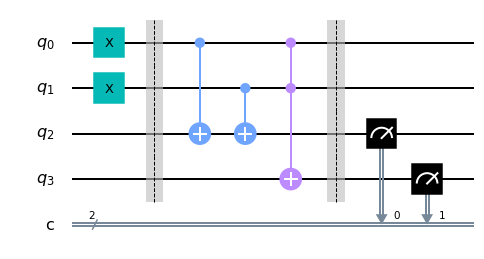

In [71]:
# YOUR CODE GOES HERE:
#VIJAY TEWARI 

backend = Aer.get_backend('statevector_simulator')
job = execute(qc, backend, memory=True)
result = job.result()
# Get the outputstate from the output vector

outputstate = result.get_statevector(qc, decimals=3)


# Print out the Ending Ket and it's Amplitude

print("\nEnding Ket Value and Amplitudes: ")
for i,amp in enumerate(outputstate):
    if abs(amp) > 0.000001:
        print('|{}> {}'.format(i, amp))
      
# Fetch the counts and print out the measurements in order (l->R)        
counts = result.get_counts(qc)
print("\nBinary Table Placement Counter::: 1 2 4 8")

for k in counts:
    binary_number = ''.join(reversed(k))
    print("Classical Register Measurements: ", binary_number)        
        
qc.draw(output='mpl')  